In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/var/folders/sz/h29lm_2j53v8vmw0zm_6hxqm0000gn/T/ipykernel_26521/2946029385.py:33: RuntimeWarning: divide by zero encountered in true_divide
  vr = -1/rvec
/var/folders/sz/h29lm_2j53v8vmw0zm_6hxqm0000gn/T/ipykernel_26521/2946029385.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


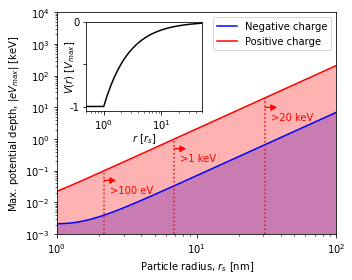

In [92]:
r = np.logspace(0, 2, 1000)

C = 1.44 # nm V

Vp = C/r * 1 + 21*(r)**2
Vn = C/r * 1 + 0.7*(r)**2

fig=plt.figure()
fig.set_size_inches(5,4)
plt.loglog(r, Vn*1e-3, 'b', label='Negative charge')
plt.fill_between(r, 1e-3*np.ones_like(r), Vn*1e-3, facecolor='b', alpha=0.3)

plt.loglog(r, Vp*1e-3, 'r', label='Positive charge')
plt.fill_between(r, 1e-3*np.ones_like(r), Vp*1e-3, facecolor='r', alpha=0.3)
plt.xlabel("Particle radius, $r_s$ [nm]")
plt.ylabel("Max. potential depth, $|eV_{max}|$ [keV]")  # $-eV(r_s)$ [keV]")
plt.xlim(1,100)
plt.ylim(1e-3, 1e4)

line_pos = [0.1,1,20]
labs = [">100 eV", ">1 keV", ">20 keV"]
for l,lb in zip(line_pos, labs):
    xval = np.interp(l, Vp*1e-3, r)
    plt.plot([xval, xval], [1e-3, l], 'r:')
    plt.arrow(xval, 0.5*l, 0.1*xval, 0, head_length=0.1*xval, head_width=0.2*l, color='r')
    plt.text(xval*1.1, 0.2*l, lb, color='r')

plt.legend(loc="upper right")

rvec = np.linspace(0,50,1000)
axins = plt.axes((0.25, 0.6, 0.32, 0.31))
#plt.figure()
vr = -1/rvec
vr[rvec < 1] = -1
axins.semilogx(rvec, vr, 'k')
plt.xlabel("$r$ [$r_s$]", labelpad=0)
plt.ylabel("$V(r)$ [$V_{max}$]", labelpad=-8)
plt.xlim(0.5,50)
plt.ylim(-1.05, 0)
plt.gca().set_yticks([-1, -0.5, 0])
plt.gca().set_yticklabels(["-1","", "0"])
plt.tight_layout()
plt.savefig("charge_vs_radius.pdf")
plt.show()